In [11]:
# The code is a test for random forest classification, last edited in 2023/10/20 by Wan

# importing necessary packages
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Creating dataset for training, only uses small amount of proton data
datadir = 'D:/LHAASO_KM2A/LHAASO/Data/Simulation/Xishui/'
#npzfiles = glob.glob(datadir + 'rec.all.Proton.1.e15_1.e16.*.npz')
npzfiles = [datadir+'rec.all.Proton.1.e12_1.e13.0_40.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Proton.1.e13_1.e14.40_70.QGSII_flukacern.root.weighted.npz',
            datadir+ 'rec.all.Proton.1.e14_1.e15.70_75.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Proton.1.e15_1.e16.70_75.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Proton.1.e16_1.e17.70_75.QGSII_flukacern.root.weighted.npz']
for i, npzfile in enumerate(npzfiles):
    if i==0:
        test = np.load(npzfile, allow_pickle=True)
        arr1 = test['E']
        arr2 = test['NhitE']
        arr3 = test['NhitM']
        arr4 = arr2/arr3
        arr5 = np.zeros(len(arr1))
    else:
        f = np.load(npzfile, allow_pickle=True)
        ene = f['E']
        ED = f['NhitE']
        MD = f['NhitM']
        EMr = ED/MD
        lab1 = np.zeros(len(ene))
        arr1 = np.append(arr1, ene)
        arr2 = np.append(arr2,ED)
        arr3 = np.append(arr3,MD)
        arr4 = np.append(arr4, EMr)
        arr5 = np.append(arr5, lab1)
X_p = np.column_stack((arr1,arr2,arr3,arr4,arr5))


In [3]:
# Creating dataset for training, only uses small amount of Fe data
datadir = 'D:/LHAASO_KM2A/LHAASO/Data/Simulation/Xishui/'
#npzfiles = glob.glob(datadir + 'rec.all.Fe.1.e15_1.e16.*.npz')
npzfiles = [datadir+'rec.all.Fe.1.e13_1.e14.40_70.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Fe.1.e14_1.e15.40_70.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Fe.1.e15_1.e16.70_75.QGSII_flukacern.root.weighted.npz',
            datadir+'rec.all.Fe.1.e16_1.e17.70_75.QGSII_flukacern.root.weighted.npz']
for i, npzfile in enumerate(npzfiles):
    if i==0:
        test = np.load(npzfile, allow_pickle=True)
        b1 = test['E']
        b2 = test['NhitE']
        b3 = test['NhitM']
        b4 = b2/b3
        b5 = 1 + np.zeros(len(b1))
    else:
        f = np.load(npzfile, allow_pickle=True)
        eneb = f['E']
        EDb = f['NhitE']
        MDb = f['NhitM']
        EMrb = EDb/MDb
        lab1b = 1 + np.zeros(len(eneb))
        b1 = np.append(b1, eneb)
        b2 = np.append(b2,EDb)
        b3 = np.append(b3,MDb)
        b4 = np.append(b4, EMrb)
        b5 = np.append(b5, lab1b)
X_f = np.column_stack((b1,b2,b3,b4,b5))

In [4]:
# Produce the final dataset for training, and shuffling is necessary. X_A is the total set of features and Y_A is the total set of labels
X_A = np.row_stack((X_p, X_f))
np.random.shuffle(X_A)
Y_A= X_A[:,4:].flatten()
X_A = X_A[:,:4]


ACCURACY OF THE MODEL:  0.9730564120464639
Confusion Matrix: [[386502   4157]
 [  9737 115274]]


(0.0, 1.0, 0.0, 1.0)

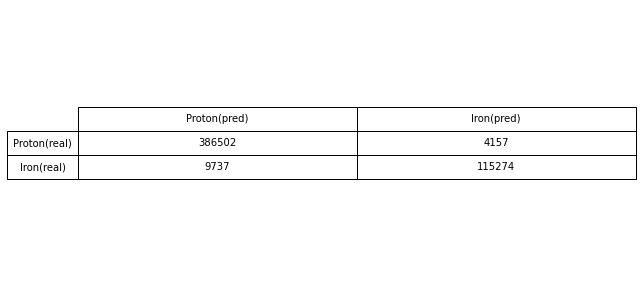

In [14]:
# Split the features and labels into a training set and a testing set, and then use random forest classifier
X_train, X_test, y_train, y_test = train_test_split(X_A, Y_A, test_size = 0.30)
numTrees = 50
clf = RandomForestClassifier( n_estimators = numTrees,  min_samples_leaf=5)
clf.fit (X_train, y_train)
y_pred = clf.predict(X_test)
print() 
# using metrics module for accuracy calculation  
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

# using confusion matrix to show the results of the test
print('Confusion Matrix:', metrics.confusion_matrix(y_test, y_pred))
met = metrics.confusion_matrix(y_test,y_pred)
col=['Proton(pred)','Iron(pred)']
row = ['Proton(real)','Iron(real)']
vals = met
plt.figure(figsize = (10,5))
tab = plt.table(cellText = vals,
                colLabels = col,
                rowLabels = row,
                loc = 'center',
                cellLoc = 'center',
                rowLoc = 'center')
tab.scale(1,2)
plt.axis('off')




In [6]:
# To calculate the feature importance 
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending = False) 
feature_imp

0    0.623117
2    0.314923
3    0.037556
1    0.024404
dtype: float64